In [1]:
# This program uses an artificial neural network called Long term short memory (LSTM)
# to predict the closing stock proce of a corporation (Apple Inc.) using the past 60 days stock price

In [2]:
#Import libraries
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

C:\Users\aryam\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('TORNTPHARM.NS', data_source='yahoo', start='2012-01-01', end='2020-4-8')
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,274.500000,267.975006,272.649994,270.799988,28842.0,231.609940
2012-01-03,275.000000,267.500000,271.000000,272.000000,12304.0,232.636276
2012-01-04,273.875000,269.000000,269.575012,269.850006,61410.0,230.797440
2012-01-05,275.000000,263.500000,271.450012,268.875000,16936.0,229.963547
2012-01-06,269.225006,262.625000,265.500000,264.274994,3064.0,226.029251
...,...,...,...,...,...,...
2020-03-31,2008.000000,1952.000000,1979.699951,1971.800049,324803.0,1971.800049
2020-04-01,1983.150024,1932.000000,1978.000000,1959.000000,96972.0,1959.000000
2020-04-03,2113.000000,1950.000000,1979.000000,2077.000000,1013029.0,2077.000000


In [4]:
#Get the number of rows and columns
df.shape

(2032, 6)

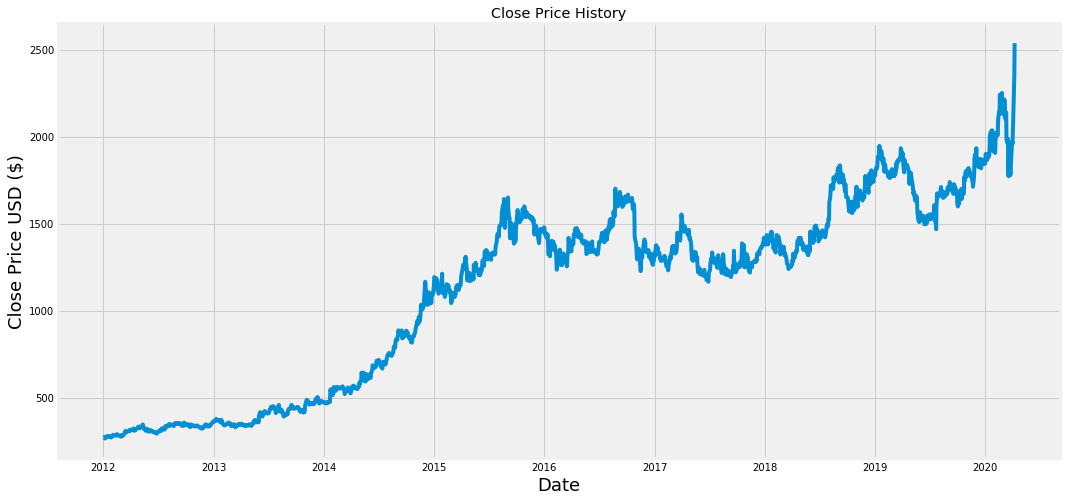

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new column with only 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

1626

In [7]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00287056],
       [0.00339848],
       [0.00245263],
       ...,
       [0.79747695],
       [0.91949232],
       [1.        ]])

In [8]:
#Create the training dataset 
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        

[array([0.00287056, 0.00339848, 0.00245263, 0.00202369, 0.        ,
       0.00157276, 0.00162776, 0.00538918, 0.00541118, 0.0051802 ,
       0.00471828, 0.00567513, 0.00663199, 0.00668698, 0.0065    ,
       0.00427835, 0.00364044, 0.00447632, 0.0026726 , 0.00481727,
       0.0052132 , 0.00791879, 0.00948056, 0.00711592, 0.00922759,
       0.0091286 , 0.00872167, 0.00801778, 0.00772083, 0.00905162,
       0.00777582, 0.01039341, 0.00901862, 0.01015145, 0.00845771,
       0.00735788, 0.00633503, 0.00632403, 0.00544417, 0.00489425,
       0.0045643 , 0.00808376, 0.00867767, 0.00762184, 0.00699493,
       0.00736887, 0.00975552, 0.01274705, 0.01658547, 0.01609054,
       0.01933505, 0.01614553, 0.01615653, 0.01651948, 0.01717938,
       0.01739935, 0.01790527, 0.02013792, 0.01948903, 0.01922506])]
[0.019675991360575157]

[array([0.00287056, 0.00339848, 0.00245263, 0.00202369, 0.        ,
       0.00157276, 0.00162776, 0.00538918, 0.00541118, 0.0051802 ,
       0.00471828, 0.00567513, 0.0

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1566, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1566/1566 [==============================] - 51s 32ms/step - loss: 0.0011


In [14]:
#Create the testing dataset 
#Create a new array containing scaled value from index 1603 to 2063
test_data = scaled_data[training_data_len - 60: , :]
#Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [15]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(( predictions - y_test)**2 ))
rmse

67.87900236913404

C:\Users\aryam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


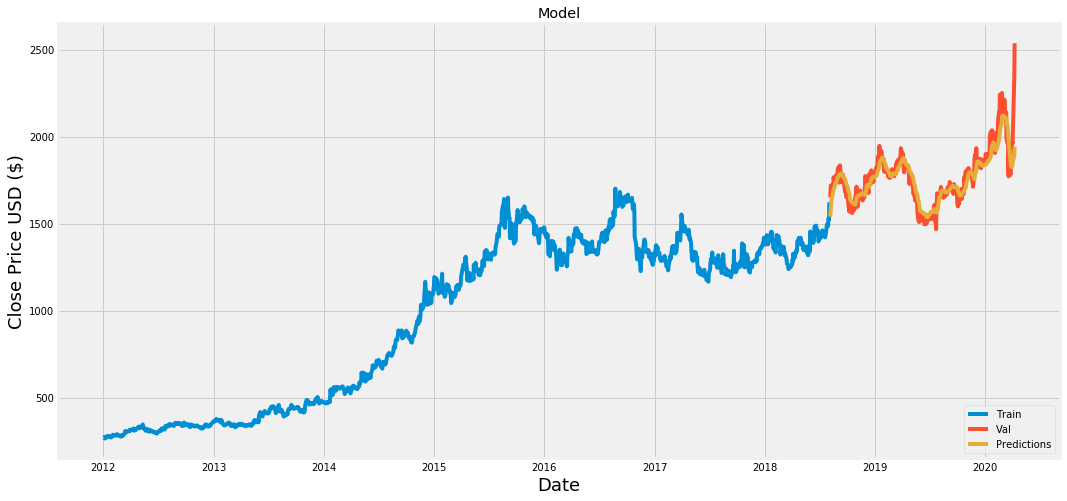

In [19]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-08-06,1651.099976,1539.831543
2018-08-07,1682.949951,1560.787231
2018-08-08,1719.699951,1585.165894
2018-08-09,1700.400024,1612.248535
2018-08-10,1697.050049,1636.170776
...,...,...
2020-03-31,1971.800049,1831.524658
2020-04-01,1959.000000,1846.768066
2020-04-03,2077.000000,1863.116455


In [21]:
#Get the quote
apple_quote = web.DataReader('TORNTPHARM.NS', data_source='yahoo', start='2012-01-01', end='2020-04-08')
#Create the dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price 
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2019.8226]]


In [22]:
#Get the quote
apple_quote2 = web.DataReader('TORNTPHARM.NS', data_source='yahoo', start='2020-04-08', end='2020-04-08')
print(apple_quote2['Close'])

Date
2020-04-08    2537.350098
Name: Close, dtype: float64
